**Breast Cancer Classification Prediction**

---

Classification

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')



In [ ]:
data = '/content/breast-cancer-wisconsin.data 2.txt'

df = pd.read_csv(data, header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.drop('Id', axis=1, inplace=True)

df.head()

#columns id id not benefit, drop it

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
#convert a features to numeric

df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce') #any not numeric data, this columns going to converted to NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
#the NaN going to be null

In [ ]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [ ]:
#9 / 7 / 6 - can be considered as outliers
#if it outliers, shall be remove and we should replace with the median

In [ ]:
df['Bare_Nuclei'].replace(np.nan, df['Bare_Nuclei'].median(), inplace=True)

df.isnull().sum()


Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [ ]:
#imbalance #outsampling #need to have the equivalent to each others

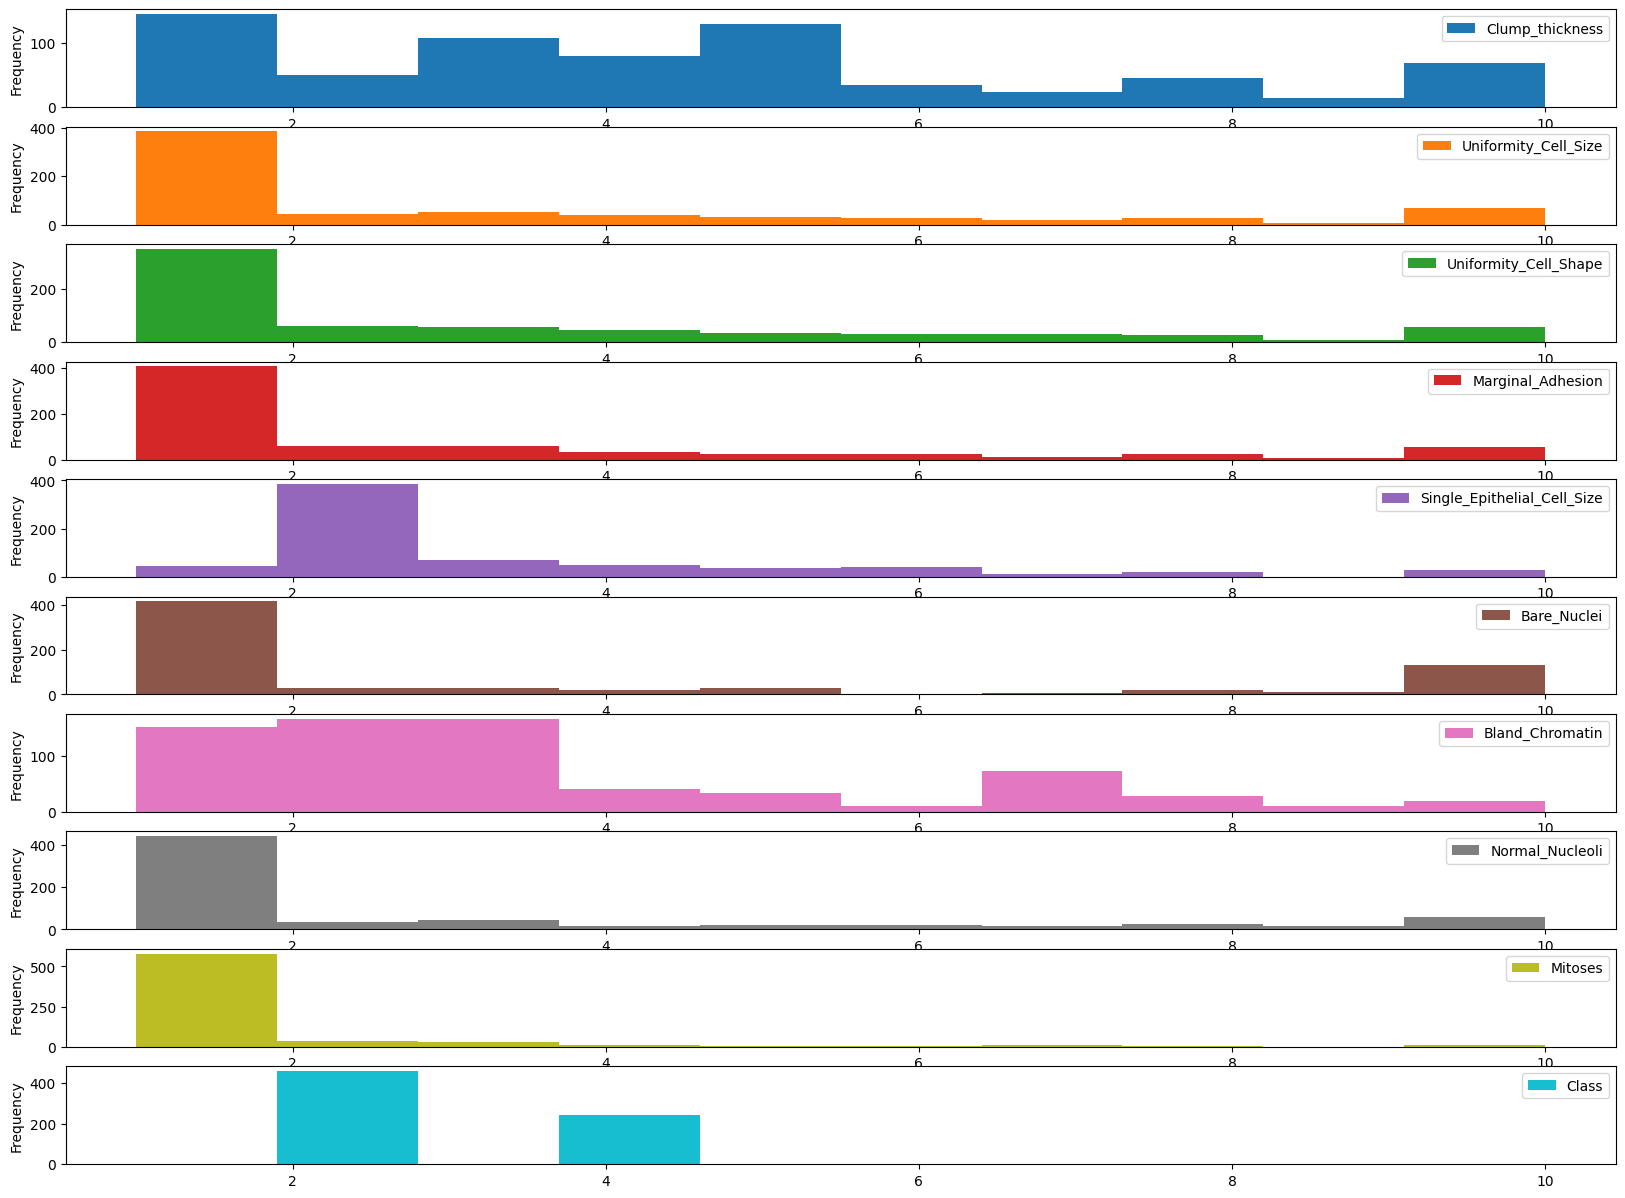

In [ ]:
#histogram

plt.rcParams['figure.figsize'] = (20,15)

df.plot(kind='hist', bins=10, subplots=True, sharex=False, sharey=False)

plt.show()


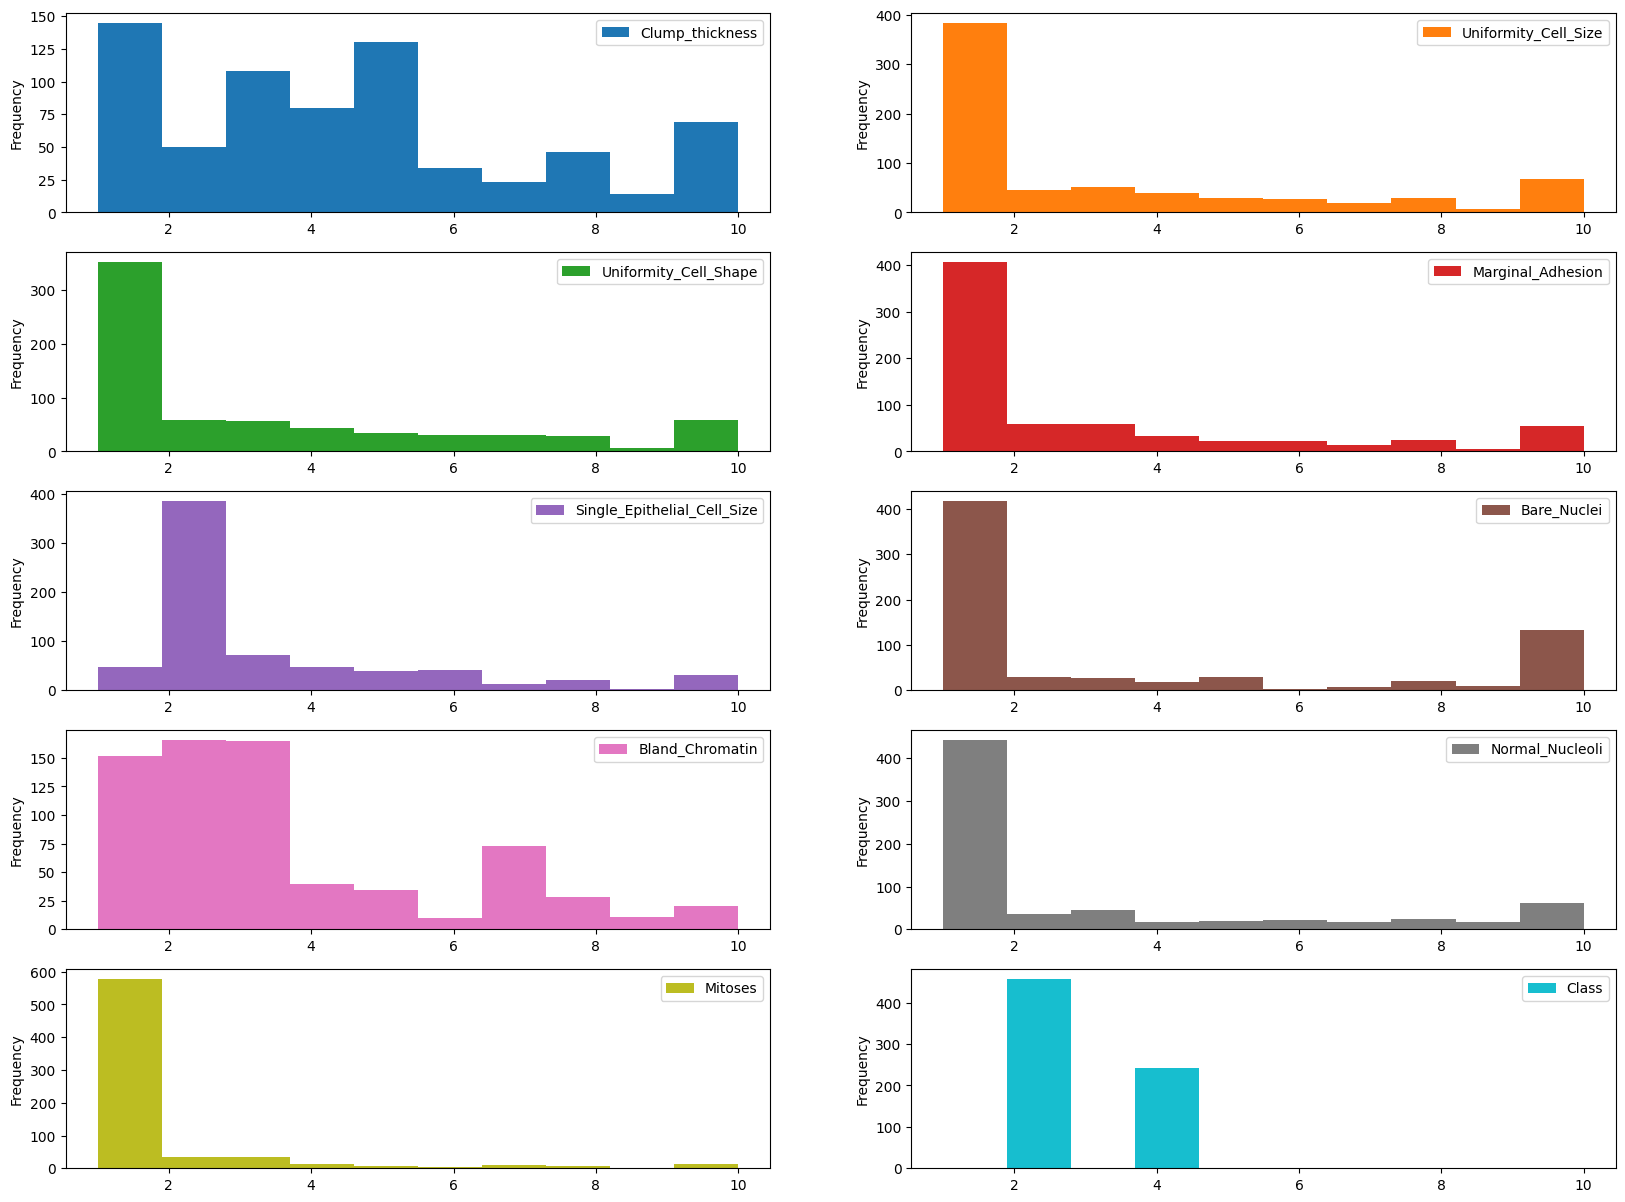

In [ ]:
#histogram

plt.rcParams['figure.figsize'] = (20,15)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()


In [ ]:
df.corr()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [ ]:
correlations = df.corr()
#default is ascending
correlations['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.818968
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

In [ ]:
correlations = df.corr()
#default is ascending
correlations['Class'].sort_values(ascending=True)

Mitoses                        0.423170
Single_Epithelial_Cell_Size    0.682785
Marginal_Adhesion              0.696800
Normal_Nucleoli                0.712244
Clump_thickness                0.716001
Bland_Chromatin                0.756616
Uniformity_Cell_Size           0.817904
Uniformity_Cell_Shape          0.818934
Bare_Nuclei                    0.818968
Class                          1.000000
Name: Class, dtype: float64

In [ ]:
X = df.drop('Class', axis=1)
#because you already assigned the variable, if you state df.drop you need to write true #default is false
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=41)

X_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
677,5,1,1,1,2,1.0,1,1,1
586,8,10,10,10,6,10.0,10,10,1
669,5,10,10,8,5,5.0,7,10,1
304,8,3,4,9,3,10.0,3,3,1
477,4,1,1,1,2,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...
407,1,1,1,1,2,1.0,2,1,1
601,1,1,1,1,1,1.0,2,1,1
243,1,1,1,1,2,5.0,5,1,1
321,3,1,1,1,2,1.0,3,1,1


In [ ]:
X_train.shape

(559, 9)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train[:5] #convert to an array

array([[ 0.19198742, -0.70294729, -0.739077  , -0.64448358, -0.54908193,
        -0.69338044, -1.01697898, -0.61193704, -0.35956247],
       [ 1.24415376,  2.29665223,  2.29626698,  2.61420677,  1.20484263,
         1.78065999,  2.70135043,  2.3887016 , -0.35956247],
       [ 0.19198742,  2.29665223,  2.29626698,  1.89005336,  0.76636149,
         0.40619308,  1.46190729,  2.3887016 , -0.35956247],
       [ 1.24415376, -0.03636962,  0.27270433,  2.25213007, -0.11060079,
         1.78065999, -0.19068356,  0.05487155, -0.35956247],
       [-0.1587347 , -0.70294729, -0.739077  , -0.64448358, -0.54908193,
        -0.69338044, -1.01697898, -0.61193704, -0.35956247]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


neigh = KNeighborsClassifier()

#training

neigh.fit(X_train, y_train) #default k neighbour is 5 #k cannot be float always integer

#prediction

y_hat = neigh.predict(X_test)

#Evaluation

print('The accuracy is:', (accuracy_score(y_test, y_hat))*100)

The accuracy is: 96.42857142857143


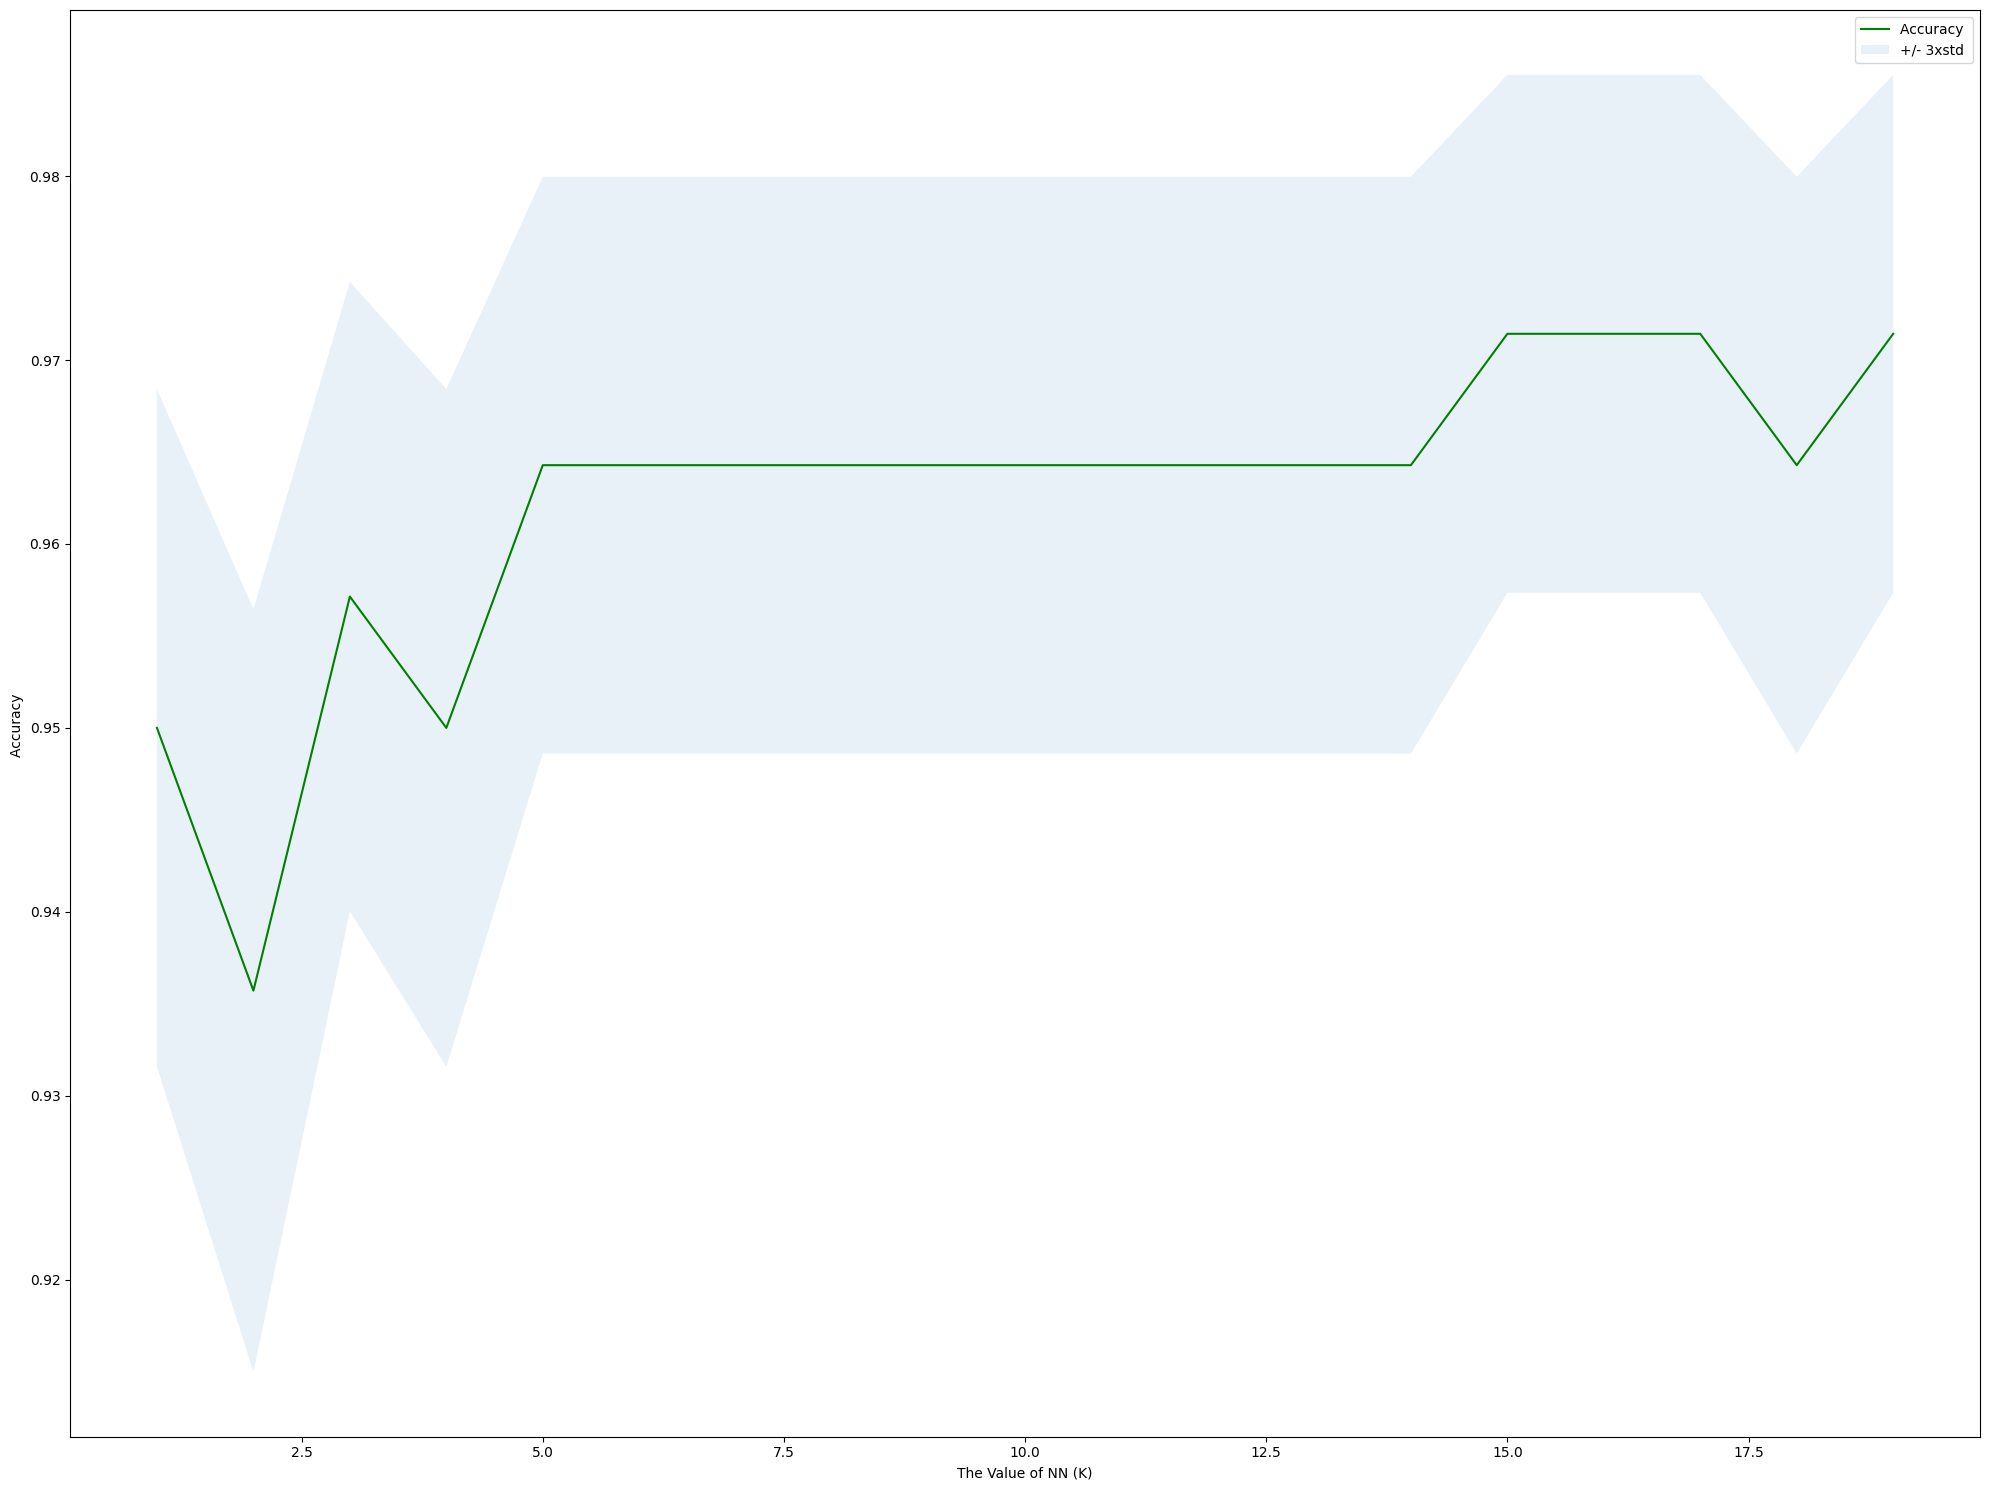



The best accuracy was with 0.9714285714285714 with k= 15


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np


Ks =20 #range of k
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat)

print('The Confusion Matrix is=', cm)


print('')
print('TP is=', cm[0, 0])
print('TN is=', cm[1, 1])
print('FP is=', cm[0, 1])
print('FN is=', cm[1, 0])


The Confusion Matrix is= [[92  3]
 [ 2 43]]

TP is= 92
TN is= 43
FP is= 3
FN is= 2


**The Correct prediction is TP and TN**, which means 94 + 44 = 138

**And the Incorrect prediction is FP and FN**, which means  1 + 1 = 2



**Check the Over-fitting**

perform well in training set but really low in an actual result

problem - not enough sample for the data set that can cause overfitting

if the gap is huge, you have the issues with the learning

In [ ]:
print ('The accuracy based in training set is:', neigh.score(X_train, y_train))
print ('The accuracy based in test set is:', neigh.score(X_test, y_test))

The accuracy based in training set is: 0.9677996422182469
The accuracy based in test set is: 0.9714285714285714


In [ ]:
#overfitting = test > training

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97        95
           4       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



**Precision:**

it is the relationship of correctly predicted positive (TP) to the total prediction of positive (TP + FP)

TP/(TP + FP)
false positive is negative false predictive
The truth positive / the truth positive + the false positive

how confuse the model about the right prediction

**Recall:**
ratio or relationship between the total actual positive and good measure for false positive

TP/(TP + FN)

how good the model will recall the right or the best prediction / right answer


Think of it this way:

Precision: Out of all the times the model predicted a positive result, how many were actually correct? Focuses on minimizing false positives.

Recall: Out of all the actual positive instances, how many did the model correctly identify? Focuses on minimizing false negatives.

In [ ]:
#how google search functions
#information retrival


F1-score = 2(precision*recall) / (precision + recall)